<a href="https://colab.research.google.com/github/venkatapranavi/ev-income-segmentation/blob/main/Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Data:


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


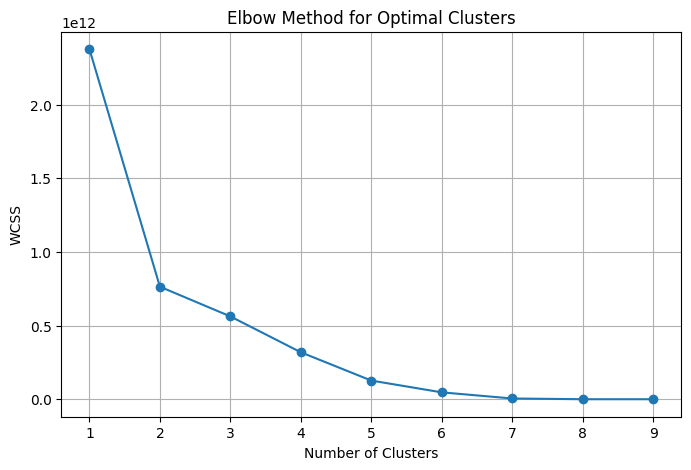

,Total Salary,Income Cluster
0,800000,2
1,2000000,0
2,1800000,0
3,2200000,0
4,2600000,0


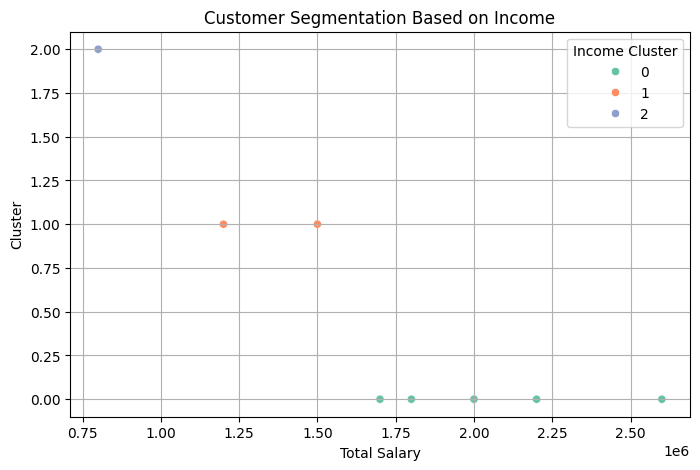

In [7]:
# STEP 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# STEP 2: Load the Excel File
# If you're using Google Colab, first upload the file using the left panel
df = pd.read_excel("income.xlsx")  # Make sure the file is uploaded or in the same directory

# STEP 3: Display First Few Rows
print("Sample Data:")
display(df.head())

# STEP 4: Extract the Column for Clustering
# We’ll segment customers based on Total Salary
X = df[['Total Salary']]

# STEP 5: Elbow Method to Find Optimal Number of Clusters
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# STEP 6: Apply KMeans Clustering
# Let's assume we choose 3 clusters based on the elbow curve
kmeans = KMeans(n_clusters=3, random_state=42)
df['Income Cluster'] = kmeans.fit_predict(X)

# STEP 7: Display Clustered Data
display(df[['Total Salary', 'Income Cluster']].head())

# STEP 8: Visualize the Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Total Salary', y='Income Cluster', hue='Income Cluster', palette='Set2')
plt.title('Customer Segmentation Based on Income')
plt.xlabel('Total Salary')
plt.ylabel('Cluster')
plt.grid(True)
plt.show()
